In [4]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [5]:
train = pd.read_csv("bigmart_train.csv")
test = pd.read_csv("bigmart_test.csv")



In [22]:
train.shape



(8523, 12)

In [23]:
train.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [24]:
test.shape


(5681, 11)

In [25]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [26]:
train["source"]= "test"
train["source"]= "train"
data = pd.concat([train, test],ignore_index= True)

In [27]:
print(data.shape)

(14204, 13)


In [28]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [30]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [31]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                       5681
dtype: int64

In [34]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [37]:
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [38]:
data["Outlet_Age"] = 2022 - data["Outlet_Establishment_Year"]

In [39]:
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [40]:
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [41]:
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [42]:
data["Outlet_Size"].mode()[0]

'Medium'

In [43]:
data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [45]:
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())

<AxesSubplot:>

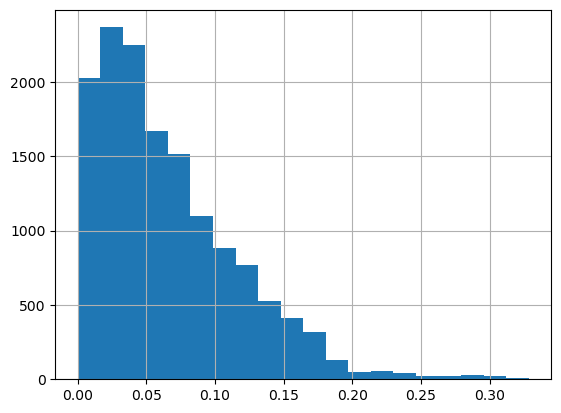

In [47]:
data["Item_Visibility"].hist(bins=20)

In [48]:
Q1 = data["Item_Visibility"].quantile(0.25)

In [49]:
Q3 = data["Item_Visibility"].quantile(0.75)

In [50]:
IQR = Q3 -Q1


In [58]:
fill_data = data.query("(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)")

In [59]:
fill_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35


In [61]:
fill_data.shape


(13943, 14)

In [63]:
data.shape

(14204, 14)

In [64]:
data = fill_data

In [65]:
data.shape

(13943, 14)

In [ ]:
data["Item_Visibility_Bins"] = pd.cut(data["Item_Visibility"], [0.000, 0.065, 0.13, 0.2], labels = ["low Viz", "Viz", "High Viz"]) 

In [80]:
data["Item_Visibility_Bins"].value_counts()

low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_Bins, dtype: int64

In [ ]:
data["Item_Visibility_Bins"] = data["Item_Visibility_Bins"].replace(np.nan, "Low Viz", regex = True)

In [ ]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(["low fat", "LF"], "Low Fat")

In [ ]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace("reg", "Regular")

In [85]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [86]:
le = LabelEncoder()


In [ ]:
data["Item_Fat_Content"] = le.fit_transform(data["Item_Fat_Content"])

In [ ]:
data["Item_Visibility_Bins"] = le.fit_transform(data["Item_Visibility_Bins"])

In [ ]:
data["Outlet_Size"] = le.fit_transform(data["Outlet_Size"])

In [ ]:
data["Outlet_Location_Type"] = le.fit_transform(data["Outlet_Location_Type"])

In [91]:
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [92]:
dummy = pd.get_dummies(data["Outlet_Type"])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [93]:
data["Item_Identifier"]


0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [94]:
data["Item_Identifier"].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
data["Item_Type_Combined"] = data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Type_Combined"] = data["Item_Identifier"].map({"FD": "Food",
                                                          "NC": " Non-Consumable",
                                                          "DR": " Drinks"})

In [119]:
data["Item_Type_Combined"].value_counts()

Series([], Name: Item_Type_Combined, dtype: int64)

In [120]:
data.shape

(13943, 16)

In [124]:
data = pd.get_dummies(data, columns= ["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Size", "Outlet_Type", "Item_Type_Combined"])

In [125]:
data.dtypes


Item_Identifier                   object
Item_Weight                      float64
Item_Visibility                  float64
Item_Type                         object
Item_MRP                         float64
Outlet_Identifier                 object
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
source                            object
Outlet_Age                         int64
Item_Visibility_Bins               int32
Item_Fat_Content_0                 uint8
Item_Fat_Content_1                 uint8
Outlet_Location_Type_0             uint8
Outlet_Location_Type_1             uint8
Outlet_Location_Type_2             uint8
Outlet_Size_0                      uint8
Outlet_Size_1                      uint8
Outlet_Size_2                      uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
dtype: object

In [197]:
import warnings
warnings.filterwarnings("ignore")

data.drop(["Item_Type", "Outlet_Establishment_Year"], axis = 1, inplace = True)

train = data.loc[data["source"] == "train"]
test =  data.loc[data["source"] == "test"]

test.drop(["Item_Outlet_Sales", "source"], axis=1, inplace = True)
test.drop(["source"], axis = 1, inplace = True)

train.to_csv["train_modified.csv"]

train.to_csv["test_modified.csv"]



KeyError: "['Item_Type', 'Outlet_Establishment_Year'] not found in axis"